# Which genres are most beneficial or detrimental to the different MH disorders included in this study?

In [134]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np

In [135]:
data_path="../gabriela's_work/cleaned_data.csv"
data= pd.read_csv(data_path)
data.head()

,Age,Hours per day,Fav genre,Music effects
0,18.0,3.0,Latin,NaN
1,63.0,1.5,Rock,NaN
2,18.0,4.0,Video game music,No effect
3,61.0,2.5,Jazz,Improve
4,18.0,4.0,R&B,Improve


In [136]:
cols= ["Age","Hours per day", "Fav genre", "Music effects"]
df=data[cols]
df.dropna()

,Age,Hours per day,Fav genre,Music effects
2,18.0,4.0,Video game music,No effect
3,61.0,2.5,Jazz,Improve
4,18.0,4.0,R&B,Improve
5,18.0,5.0,Jazz,Improve
6,18.0,3.0,Video game music,Improve
...,...,...,...,...
731,17.0,2.0,Rock,Improve
732,18.0,1.0,Pop,Improve
733,19.0,6.0,Rap,Improve
734,19.0,5.0,Classical,Improve


In [137]:
#Age groups
bins = [0, 30, 40, 50, 60, 100]
labels= ['<20', '20-39', '40-49', '50-59', '60+']

In [138]:
df["Age_Group"]=pd.cut(df["Age"], bins=bins, labels=labels)
df.head()

,Age,Hours per day,Fav genre,Music effects,Age_Group
0,18.0,3.0,Latin,NaN,<20
1,63.0,1.5,Rock,NaN,60+
2,18.0,4.0,Video game music,No effect,<20
3,61.0,2.5,Jazz,Improve,60+
4,18.0,4.0,R&B,Improve,<20


In [139]:
df.info()
df['Age'] = df['Age'].astype(object)
df['Hours per day'] = df['Hours per day'].astype(object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Age            735 non-null    float64 
 1   Hours per day  736 non-null    float64 
 2   Fav genre      736 non-null    object  
 3   Music effects  728 non-null    object  
 4   Age_Group      735 non-null    category
dtypes: category(1), float64(2), object(2)
memory usage: 24.1+ KB


In [140]:

df2=df.set_index(["Age_Group"])["Music effects"]
df2


Age_Group
<20          NaN
60+          NaN
<20    No effect
60+      Improve
<20      Improve
         ...    
<20      Improve
<20      Improve
<20      Improve
<20      Improve
<20      Improve
Name: Music effects, Length: 736, dtype: object

In [141]:
music_results=df["Music effects"].value_counts()
music_results

Music effects
Improve      542
No effect    169
Worsen        17
Name: count, dtype: int64

In [142]:
improve_data=df.loc[(df["Music effects"] =="Improve")]
improve_data_count=improve_data.groupby(["Fav genre"]).size()
improve_data_count.sort_values(ascending=False)

Fav genre
Rock                126
Pop                  85
Metal                67
Classical            39
Hip hop              31
EDM                  30
R&B                  26
Video game music     26
Folk                 23
Country              20
K pop                19
Rap                  17
Jazz                 16
Lofi                 10
Gospel                6
Latin                 1
dtype: int64

In [143]:
no_effect_data=df.loc[(df["Music effects"] =="No effect")]
no_effect_data_count=no_effect_data.groupby(["Fav genre"]).size()
no_effect_data_count.sort_values(ascending=False)

Fav genre
Rock                53
Pop                 25
Metal               21
Video game music    14
Classical           13
R&B                  9
EDM                  6
Folk                 6
Country              5
Hip hop              4
Jazz                 4
K pop                4
Rap                  4
Latin                1
dtype: int64

In [144]:
worsen_data=df.loc[(df["Music effects"] =="Worsen")]
worsen_data_count=worsen_data.groupby(["Fav genre"]).size()
worsen_data_count.sort_values(ascending=False)

Fav genre
Rock                7
Pop                 4
Video game music    4
Classical           1
Rap                 1
dtype: int64

In [202]:
hours=df[(["Fav genre","Hours per day"])]
hours_day=hours.groupby(["Fav genre"]).size()
hours_per_day=hours_day.sort_values(ascending=False)
hours_per_day

Fav genre
Rock                188
Pop                 114
Metal                88
Classical            53
Video game music     44
EDM                  37
Hip hop              35
R&B                  35
Folk                 30
K pop                26
Country              25
Rap                  22
Jazz                 20
Lofi                 10
Gospel                6
Latin                 3
dtype: int64

In [203]:

effects_data=pd.DataFrame({
    "Improve": improve_data_count,
    "No Effect": no_effect_data_count,
    "Worsen": worsen_data_count,
    "Hours per day":hours_per_day
})

organize_data=effects_data.sort_values(by= "Improve",ascending=False)

organize_data.fillna(0, inplace=True)

organize_data["Total"]=organize_data["Improve"] + organize_data["No Effect"]+ organize_data["Worsen"]
#for index, row in organize_data.iterrows():
     #total = sum(row)
    #organize_data.at[index, 'Total'] = total

#organize_data.fillna(0, inplace=True)
organize_data

,Improve,No Effect,Worsen,Hours per day,Total
Fav genre,,,,,
Rock,126,53.0,7.0,188,186.0
Pop,85,25.0,4.0,114,114.0
Metal,67,21.0,0.0,88,88.0
Classical,39,13.0,1.0,53,53.0
Hip hop,31,4.0,0.0,35,35.0
EDM,30,6.0,0.0,37,36.0
R&B,26,9.0,0.0,35,35.0
Video game music,26,14.0,4.0,44,44.0
Folk,23,6.0,0.0,30,29.0


In [146]:
organize_data["Improve"].mean()

33.875

In [208]:
organize_data["% Improve"]=(organize_data["Improve"]/ organize_data['Total']) * 100
organize_data["% No Effect"]=(organize_data["No Effect"]/ organize_data['Total']) * 100
organize_data["% Worsen"]=(organize_data["Worsen"]/ organize_data['Total']) * 100

organize_data

,Improve,No Effect,Worsen,Hours per day,Total,% Improve,% No Effect,% Worsen
Fav genre,,,,,,,,
Rock,126,53.0,7.0,188,186.0,67.741935,28.494624,3.763441
Pop,85,25.0,4.0,114,114.0,74.561404,21.929825,3.508772
Metal,67,21.0,0.0,88,88.0,76.136364,23.863636,0.000000
Classical,39,13.0,1.0,53,53.0,73.584906,24.528302,1.886792
Hip hop,31,4.0,0.0,35,35.0,88.571429,11.428571,0.000000
EDM,30,6.0,0.0,37,36.0,83.333333,16.666667,0.000000
R&B,26,9.0,0.0,35,35.0,74.285714,25.714286,0.000000
Video game music,26,14.0,4.0,44,44.0,59.090909,31.818182,9.090909
Folk,23,6.0,0.0,30,29.0,79.310345,20.689655,0.000000


In [211]:
columns=[ "% Improve", "% No Effect", "% Worsen", "Hours per day"]
percentage_data=organize_data[columns]

rounded_up=percentage_data.map(round, ndigits=None)
rounded_up


,% Improve,% No Effect,% Worsen,Hours per day
Fav genre,,,,
Rock,68,28,4,188
Pop,75,22,4,114
Metal,76,24,0,88
Classical,74,25,2,53
Hip hop,89,11,0,35
EDM,83,17,0,37
R&B,74,26,0,35
Video game music,59,32,9,44
Folk,79,21,0,30


In [149]:

#rounded_up["% Improve"]=rounded_up["% Improve"].map("%{:,.2f}".format)
#rounded_up["% No Effect"]=rounded_up["% No Effect"].map("%{:,}".format)
#rounded_up["% Worsen"]=rounded_up["% Worsen"].map("%{:,}".format)
#fixed=rounded_up
#fixed

In [212]:
filter=rounded_up.loc[(organize_data["Improve"] >=26)]
filtered=filter.sort_values(by="% Improve", ascending= False)
filtered

,% Improve,% No Effect,% Worsen,Hours per day
Fav genre,,,,
Hip hop,89,11,0,35
EDM,83,17,0,37
Metal,76,24,0,88
Pop,75,22,4,114
Classical,74,25,2,53
R&B,74,26,0,35
Rock,68,28,4,188
Video game music,59,32,9,44


In [151]:
updated=filtered["% Improve"].map("{:,}".format)
updated

Fav genre
Hip hop             89
EDM                 83
Metal               76
Pop                 75
Classical           74
R&B                 74
Rock                68
Video game music    59
Name: % Improve, dtype: object

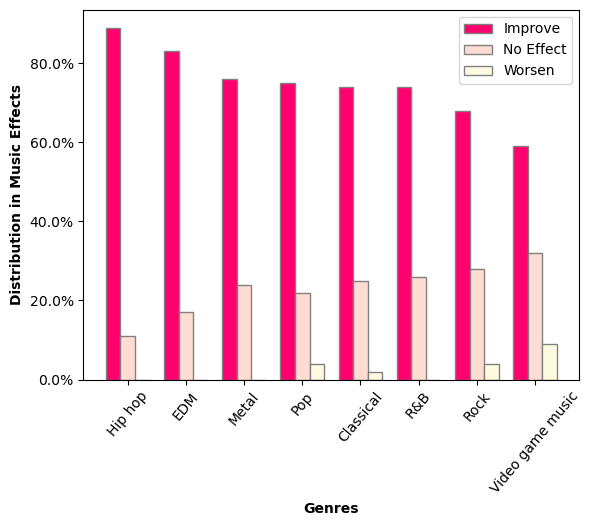

In [152]:
# Data from the table
genres = filtered.index
values=filtered.values.T


# Create a figure and axis      
fig, ax = plt.subplots()

# Set the width of the bars
bar_width = 0.25

# Set the position of the bars on the x-axis
r1 = range(len(genres))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width*2 for x in r1]



# Plot the bars
plt.bar(r1,values[0], color='#ff006e', width=bar_width, edgecolor='grey', label='Improve')
plt.bar(r2,values[1], color= "#ffddd2", width=bar_width, edgecolor='grey', label='No Effect')
plt.bar(r3,values[2], color='#fefae0', width=bar_width, edgecolor='grey', label='Worsen')

# Add xticks on the middle of the group bars
plt.xlabel('Genres', fontweight='bold')
plt.ylabel("Distribution in Music Effects", fontweight='bold')
plt.xticks([r + bar_width for r in range(len(genres))], genres, rotation=50)

# Convert Y-axis to percentage format
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,}%'.format(x))) 



# Add a legend
plt.legend()


plt.show()


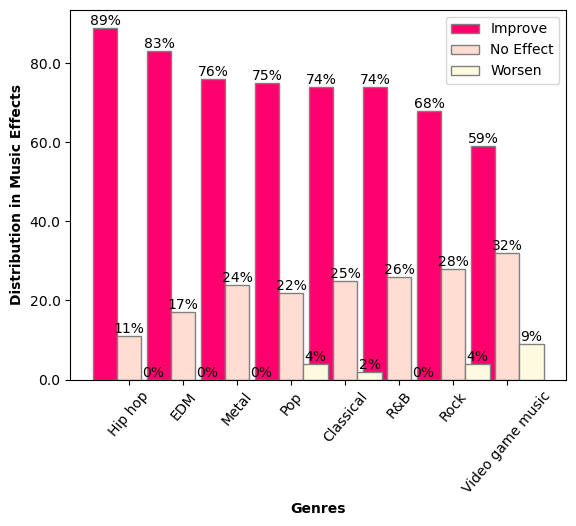

In [153]:
# Data from the table
genres = filtered.index
values=filtered.values.T


# Create a figure and axis      
fig, ax = plt.subplots()

# Set the width of the bars
bar_width = 0.45

# Set the position of the bars on the x-axis
r1 = range(len(genres))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width*2 for x in r1]



# Plot the bars
bar1= plt.bar(r1,values[0], color='#ff006e', width=bar_width, edgecolor='grey', label='Improve')
bar2=plt.bar(r2,values[1], color= "#ffddd2", width=bar_width, edgecolor='grey', label='No Effect')
bar3=plt.bar(r3,values[2], color='#fefae0', width=bar_width, edgecolor='grey', label='Worsen')

# Add xticks on the middle of the group bars
plt.xlabel('Genres', fontweight='bold')
plt.ylabel("Distribution in Music Effects",fontweight='bold')

plt.xticks([r + bar_width for r in range(len(genres))], genres, rotation=50)

# Convert Y-axis to percentage format
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,}'.format(x))) 


# Add values on top of the bars
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, '{:.0f}%'.format(height),
                ha='center', va='bottom')


# Add a legend
plt.legend()
plt.show()

In [154]:
genres = organize_data.index
genres

Index(['Rock', 'Pop', 'Metal', 'Classical', 'Hip hop', 'EDM', 'R&B',
       'Video game music', 'Folk', 'Country', 'K pop', 'Rap', 'Jazz', 'Lofi',
       'Gospel', 'Latin'],
      dtype='object', name='Fav genre')

In [155]:
fav_genre=df["Fav genre"].value_counts()
fav_genre

Fav genre
Rock                188
Pop                 114
Metal                88
Classical            53
Video game music     44
EDM                  37
R&B                  35
Hip hop              35
Folk                 30
K pop                26
Country              25
Rap                  22
Jazz                 20
Lofi                 10
Gospel                6
Latin                 3
Name: count, dtype: int64

In [156]:
cols2=["Age_Group","Hours per day", "Fav genre","Music effects"]
df3=df[cols2]
df4=df3.dropna().set_index(["Age_Group"])
df4.sort_values(by="Hours per day", ascending=False)

,Hours per day,Fav genre,Music effects
Age_Group,,,
<20,24.0,Rap,Improve
<20,24.0,Rock,Improve
60+,24.0,Rap,No effect
<20,20.0,Rock,No effect
<20,18.0,EDM,Improve
...,...,...,...
40-49,0.0,Rock,No effect
20-39,0.0,Rock,Worsen
40-49,0.0,Rock,No effect


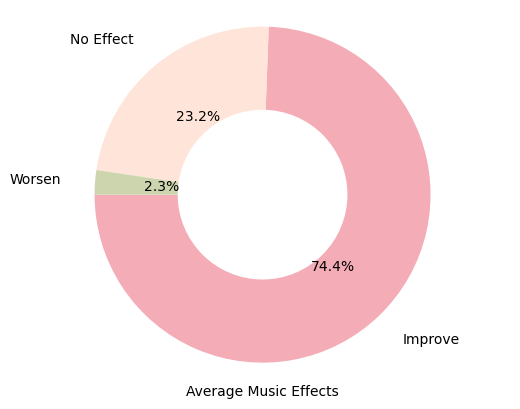

In [157]:
# Data for the pie chart
labels = ['Improve', 'No Effect', 'Worsen']
sizes = [108.2, 33.8, 3.4]
colors = ['#F4ACB7', '#FFE5D9', '#CCD5AE']  

# Plotting the pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=180, labeldistance=1.2, colors= colors)

# Draw a white circle in the center to create the donut effect
centre_circle = plt.Circle((0, 0), 0.5, color='white', fc='white', linewidth=1.25)
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.xlabel('Average Music Effects')

# Display the donut chart
plt.show()

In [186]:
positive=improve_data.groupby(["Age_Group"]).size()
nothing=no_effect_data.groupby(["Age_Group"]).size()
negative=worsen_data.groupby(["Age_Group"]).size()
hours_per_day=df4["Hours per day"]
hours_effect=pd.DataFrame({
    "Improve": positive,
    "No Effect": nothing,
    "Worsen": negative,
    
})


hours_data=hours_effect.sort_values(by="Age_Group",ascending=True)
hours_data

C:\Users\gabri\AppData\Local\Temp\ipykernel_15612\3874969686.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  positive=improve_data.groupby(["Age_Group"]).size()
C:\Users\gabri\AppData\Local\Temp\ipykernel_15612\3874969686.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nothing=no_effect_data.groupby(["Age_Group"]).size()
C:\Users\gabri\AppData\Local\Temp\ipykernel_15612\3874969686.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and sile

,Improve,No Effect,Worsen
Age_Group,,,
<20,443,125,12
20-39,45,26,5
40-49,19,7,0
50-59,18,8,0
60+,16,3,0


Text(0.5, 1.0, 'Music Effects vs Age group')

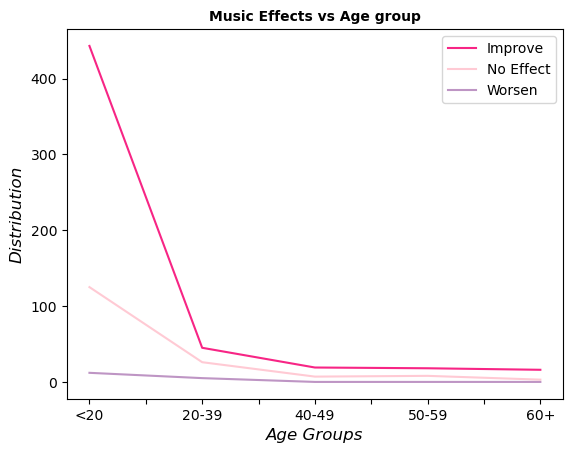

In [278]:

hours_data.plot(color=['#f72585', "#ffcad4", "#be95c4"])
plt.xlabel("Age Groups", fontsize=12, fontstyle="italic")
plt.ylabel("Distribution", fontsize=12, fontstyle="italic")
plt.title("Music Effects vs Age group", fontsize=10, fontweight="bold")

In [220]:
filtered

,% Improve,% No Effect,% Worsen,Hours per day
Fav genre,,,,
Hip hop,89,11,0,35
EDM,83,17,0,37
Metal,76,24,0,88
Pop,75,22,4,114
Classical,74,25,2,53
R&B,74,26,0,35
Rock,68,28,4,188
Video game music,59,32,9,44


In [244]:
hours_=filtered["Hours per day"]
improvement=filtered["% Improve"]
none=filtered["% No Effect"]

Text(0.5, 1.0, 'trial')

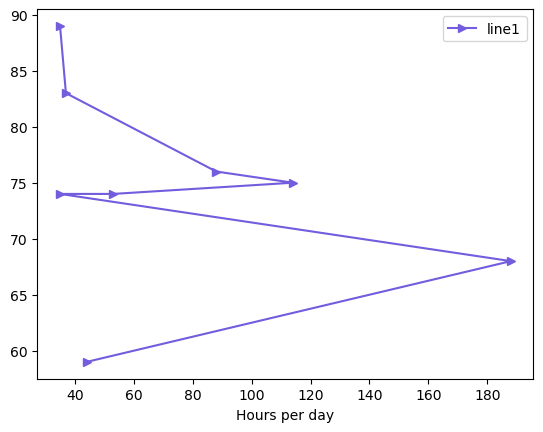

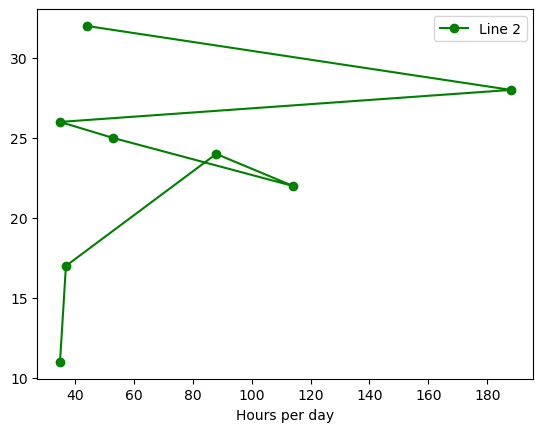

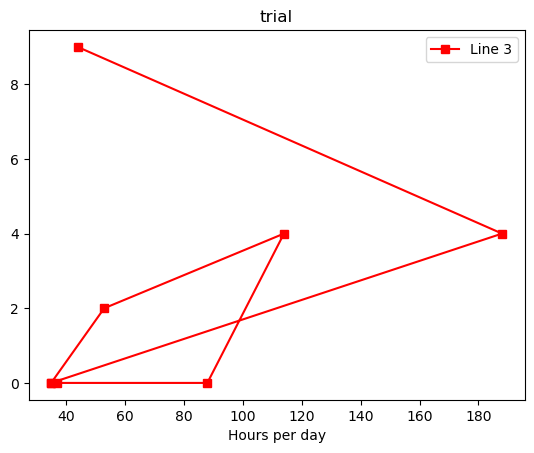

In [286]:
filtered.plot("Hours per day","% Improve", color="#735CDD", label="line1",marker=">")
filtered.plot("Hours per day","% No Effect",color="green", label="Line 2", marker="o")  # Add a second line
filtered.plot("Hours per day", "% Worsen", color="red", label="Line 3", marker="s")  # Add a third line
plt.title("trial")

In [281]:
cols5=["% Improve",	"% No Effect", "% Worsen"]
filtered2=filtered[cols5]
filtered2

,% Improve,% No Effect,% Worsen
Fav genre,,,
Hip hop,89,11,0
EDM,83,17,0
Metal,76,24,0
Pop,75,22,4
Classical,74,25,2
R&B,74,26,0
Rock,68,28,4
Video game music,59,32,9


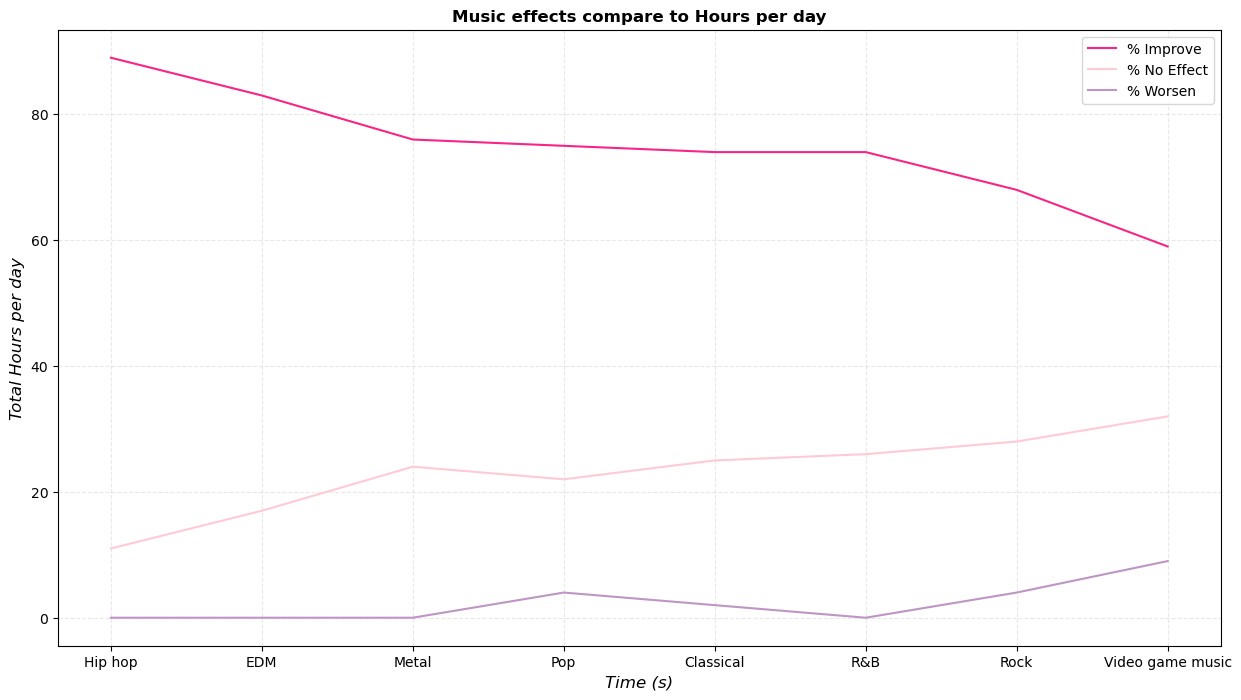

In [300]:


filtered2.plot.line(figsize=(15, 8), color=['#f72585', "#ffcad4", "#be95c4"])



plt.xlabel("Time (s)", fontsize=12, fontstyle="italic")
plt.ylabel("Total Hours per day", fontsize=12, fontstyle="italic")
plt.title("Music effects compare to Hours per day", fontsize=12, fontweight="bold")



# legend and grid
plt.legend()
plt.grid(color="lightgrey", linestyle="--", alpha=0.5)

In [218]:
filtered2= filtered.set_index('Hours per day')
filtered2

,% Improve,% No Effect,% Worsen
Hours per day,,,
35,89,11,0
37,83,17,0
88,76,24,0
114,75,22,4
53,74,25,2
35,74,26,0
188,68,28,4
44,59,32,9


In [169]:
cols3=["Hours per day", "Fav genre","Music effects"]
line_data=data[cols3]
line_data.set_index(['Hours per day']).dropna()


,Fav genre,Music effects
Hours per day,,
4.0,Video game music,No effect
2.5,Jazz,Improve
4.0,R&B,Improve
5.0,Jazz,Improve
3.0,Video game music,Improve
...,...,...
2.0,Rock,Improve
1.0,Pop,Improve
6.0,Rap,Improve


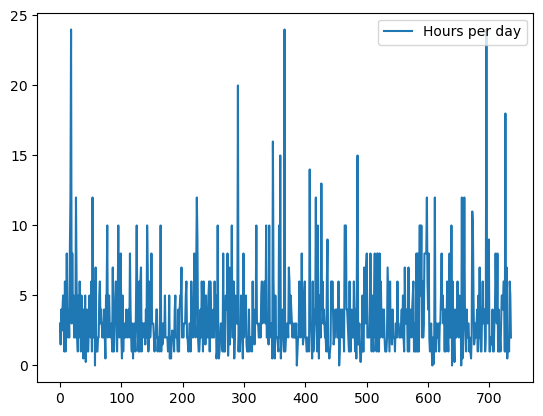

In [230]:

lines =line_data.plot.line()